# <center> Customer segmentation using Hierarchical Clustering


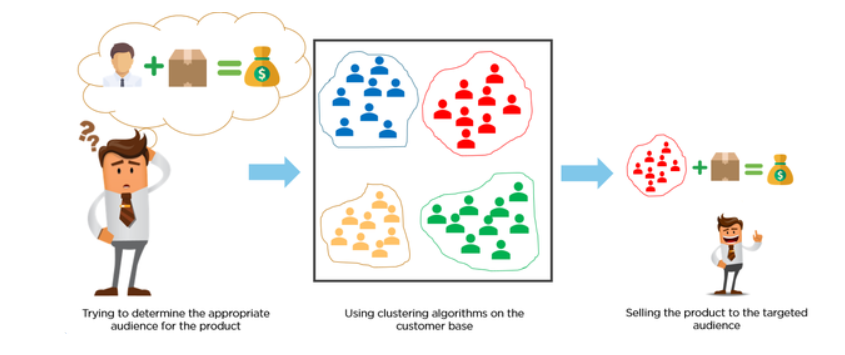

**Importing the dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style("darkgrid")

**Data collection and analysis**

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isna().sum().sum()

0

In [5]:
# No nulls

In [6]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Only taking Annual Income (k$) and Spending Score (1-100)**

In [8]:
x=df.iloc[:,2:4].values

In [9]:
import scipy.cluster.hierarchy as sch

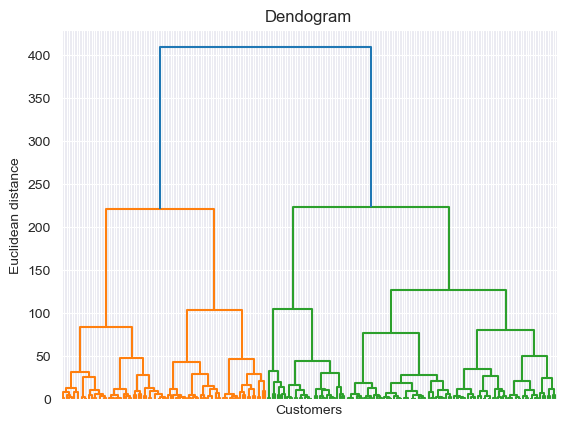

In [18]:
dendogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distance")
plt.tick_params(axis='x',labelbottom=False);

**Optimum number of clusters can be 5**

In [17]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

In [28]:
from sklearn.metrics import silhouette_score
silhouette_score(x,labels=y_hc,metric='euclidean')

0.36930163803129956

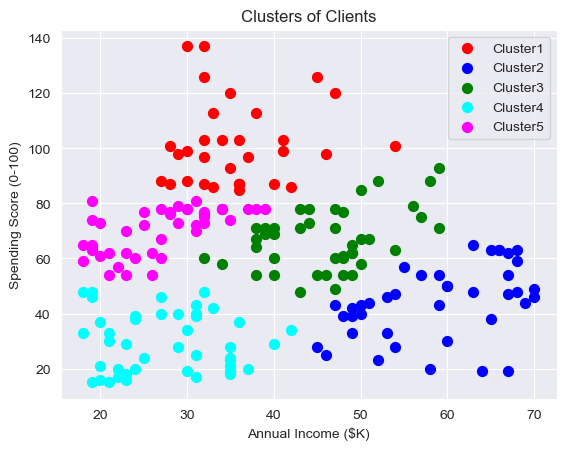

In [24]:
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s=50, c='red', label='Cluster1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s=50, c='blue', label='Cluster2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s=50, c='green', label='Cluster3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s=50, c='cyan', label='Cluster4')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s=50, c='magenta', label='Cluster5')

plt.title("Clusters of Clients")
plt.xlabel("Annual Income ($K)")
plt.ylabel("Spending Score (0-100)")
plt.legend();

**Visualising all the data points in centroid and clusters**

**Now that our customers are seggregated in different clusters , the team along with domain speefic 
team must collaborate to make marketing strategies to target them differently for maximum output.**